# Avaliação - semana 15
## FSC5705 - Física Computacional
## 15/07/2024

### Atenção
- **Não esqueça de reiniciar o kernel e rodar todas as células para testar o notebook antes de enviar.**

Considere o circuito RC abaixo.

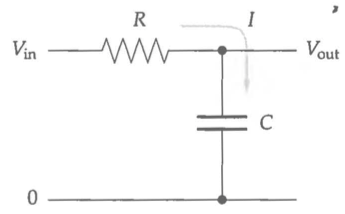

Este circuito funciona como um filtro, dada uma tensão de entrada $V_\text{in}(t)$, o circuito fornece uma tensão de saída $V_\text{out}(t)$. Vamos analisar este circuito e tentar determinar $V_\text{out}$ dada uma entrada $V_\text{in}$. Considere que a carga colocada em $V_\text{out}$ é de alta impedância, e a corrente que sai do circuito é desprezível. Isto é, a corrente que passa pelo resistor é a mesma que pelo capacitor.

Usando a lei das malhas,

$$
IR = V_\text{in}(t) - V_\text{out}.
$$

Por outro lado, no capacitor,

$$
I = \frac{\mathrm{d}Q}{\mathrm{d}t},\qquad Q = C V_\text{out}.
$$

Juntando estas equações, é fácil mostrar que

$$
 \frac{\mathrm{d}V_\text{out}}{\mathrm{d}t} = \frac{1}{RC} \left(V_\text{in}(t) - V_\text{out} \right).
$$

Nesta equação, $t$ é a variável independente, $V_\text{out}$ é a variável independente, e $V_\text{in}$ é uma função de $t$.

Para resolver esta equação, precisamos saber primeiro a tensão de entrada, $V_\text{in}(t)$. Vamos supor que temos uma onda retangular de frequência $\nu$, em $[\mathrm{Hz}]$, e amplitude $1\,\mathrm{V}$. Uma forma de descrever esta função matematicamente é

\begin{align}
V_\text{in}(t) = \left\{ \
\begin{array}{ll}
1\,\mathrm{V} \qquad &\text{se} \lfloor 2\nu t \rfloor \text{é par}, \\
-1\,\mathrm{V} \qquad &\text{se} \lfloor 2\nu t \rfloor \text{é ímpar},
\end{array}
\right .
\end{align}

onde $\lfloor x \rfloor$ é significa "$x$ arredondado para o inteiro imediatamente abaixo". Em python, podemos usar a função `np.floor()`. Abaixo, temos uma função chamada `Vin(t, nu)` que implementa esta onda retangular.

In [ ]:
import numpy as np

def Vin(t, nu):
    if np.floor(2 * nu * t) % 2:
        return 1.0
    else:
        return -1.0

Vamos fazer o seu gráfico para uma frequência de $2\,\mathrm{Hz}$, com $t$ variando de $0$ até $3\,\mathrm{s}$.

In [ ]:
nu = 2.0
ti = 0.0
tf = 3.0
N = 1000
h = (tf - ti) / N

t = np.zeros(N)
Vi = np.zeros(N)

for j in range(N):
    t[j] = ti + j * h
    Vi[j] = Vin(t[j], nu)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

In [ ]:
fig, ax = plt.subplots()
ax.plot(t, Vi)
ax.set_xlabel(r'$t\ [\mathrm{s}]$')
ax.set_ylabel(r'$V_\mathrm{in}(t)\ [\mathrm{V}]$')
plt.show()

#### Questão 1

Vamos escolher uma capacitância $C = 47\,\mathrm{nF}$, e uma resistência $R = 4.7\,\mathrm{k \Omega}$. Usando a função $V_\text{in}(t)$ definido acima, com uma frequência $\nu = 2000\,\mathrm{Hz}$, determine $V_\text{out}(t)$, com a condição inicial $V_\text{out}(0) = 0$. Calcule a solução deste problema de condições iniciais usando o método RK4 programado explicitamente.

A solução deverá ser uma função periódica, com período semelhante ao da tensão de entrada. Logo, é conveniente usar como passo de tempo $h$ uma fração pequena do período.

Faça o gráfico de $V_\text{in}(t)$ e $V_\text{out}(t)$ sobrepostos no mesmo subplot.

#### Questão 2

Crie outra função para gerar uma tensão de entrada senoidal, isto é, $V^\prime_\text{in}(t) = \cos(2\pi \nu t)$. Encontre a solução do circuito, e faça o gráfico de entrada e saída no mesmo subplot, como o item acima. Teste o gráfico da solução para  $\nu = 200$, $800$ e $2000\,\mathrm{Hz}$.

### Questão 3

Este é um circuito RC agindo como um filtro *passa-baixa*. Verifique se a amplitude da tensão de saída é atenuada da forma esperada, quando se varia a frequência. No caso de uma onda senoidal,

\begin{align}
\frac{V_\mathrm{out}}{V_\mathrm{in}} = \frac{X_\mathrm{C}}{\sqrt{R^2 + X_\mathrm{C}^2}}, \\
X_\mathrm{C} = \frac 1 {2 \pi \nu C},
\end{align}

onde $X_{\mathrm{C}}$ é a reatância capacitiva do capacitor $C$ e $V_\mathrm{in}$ e $V_\mathrm{out}$ são os valores médios quadráticos (RMS) da tensão de entrada e de saída.

Calcule os valores RMS da solução que você calculou, e compare com o valor esperado. Certifique-se de calcular a solução por vários períodos, para ter mais precisão na média.